In [1]:
import time
import numpy as np
import torch
import h5py
import math
from torch import nn, optim
from torch.autograd import Variable

import matplotlib.pyplot as plt
from funcs import plot_data, L2loss
%matplotlib inline

## GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [2]:
## import net
from source_transformation import wavenet2d as myNet
net = myNet()
net.load_state_dict(torch.load('./checkpoints/checkpoint.pkl'))
net = net.to(device)

In [3]:
### test
time_span = 4095
time_span2 = 2048
receiver = 921
trace = 3
testnum = 307

## load testdata
f = h5py.File("./data/testdata_shot77.h5", "r")
X = f['X'][:]
Y = f['Y'][:]
f.close()

Xinput = np.zeros([testnum,1,time_span,trace])

for k in range(1):
    for i in range(testnum):
        Xinput[k*testnum+i,0,:time_span2,:] = X[:,trace*i:trace*i+trace].reshape((1,1,time_span2,trace))
        
with torch.no_grad():
    Xt = Variable(torch.from_numpy(Xinput))
    Xt = Xt.to(device).type(torch.cuda.FloatTensor)
    Youtput = net(Xt).data.cpu().numpy()

Y_hat = np.zeros([time_span2,receiver])
for k in range(1):
    for i in range(testnum):
        Y_hat[:,i*trace:i*trace+trace] = Youtput[i][0]

print(L2loss(Y_hat,Y))

0.0005890062960248283


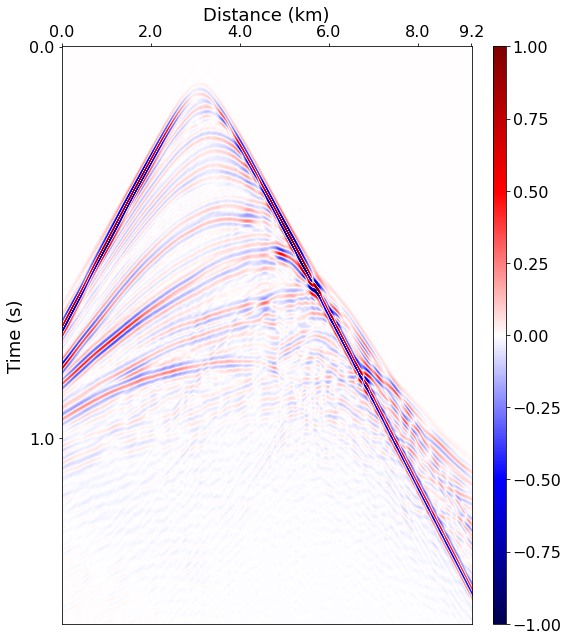

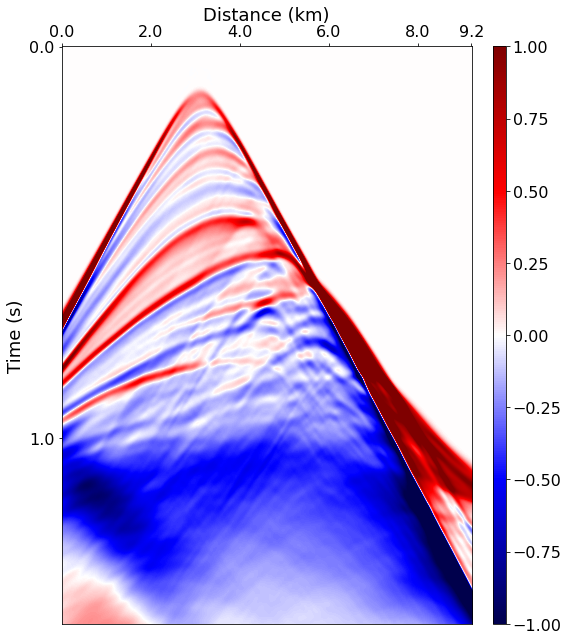

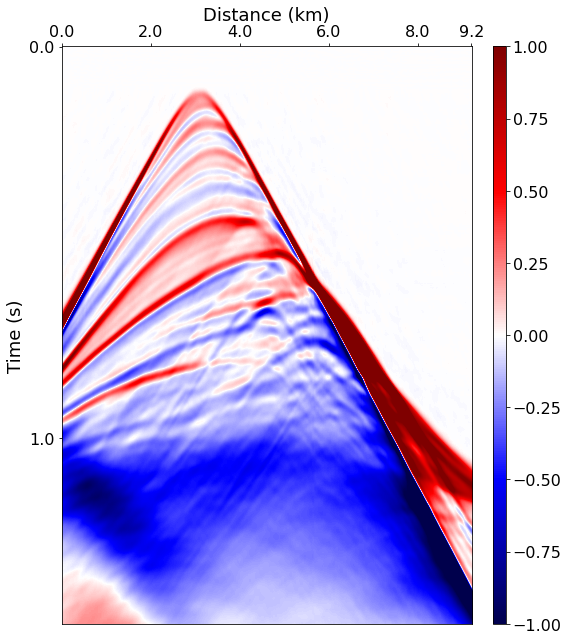

In [4]:
plot_data(X)
plot_data(Y)
plot_data(Y_hat)